In [ ]:
"""
Problem Statement No. 15 
Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input 
text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, 
Alexa Firesticks etc. Perform following operations on this dataset. 
(I) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback) 
(II) Convert the review text into lowercase. 
(III) Remove all punctuations from review text. 
(IV) Remove emoticons and emojis from the text 
(V) Tokenize the review text into words. 
(VI) Remove the Stopwords from the tokenized text. 
"""

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [54]:
df= pd.read_csv('Alexa-Dataset.csv')

In [55]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [56]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [57]:
df.shape

(3150, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [59]:
df.dropna(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.6+ KB


In [61]:
feedback_counts = df['feedback'].value_counts()

In [62]:
feedback_counts

feedback
1    2893
0     256
Name: count, dtype: int64

<AxesSubplot:xlabel='feedback'>

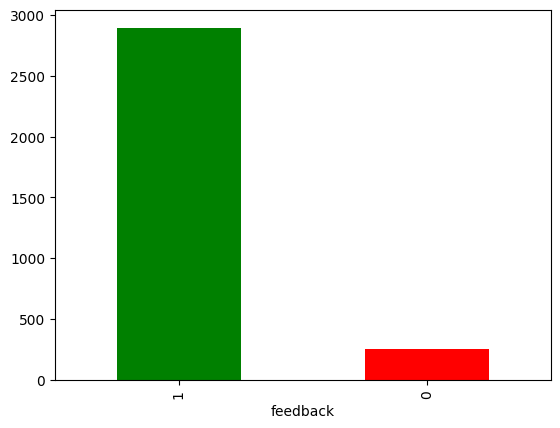

In [63]:
feedback_counts.plot(kind='bar', color=['green', 'red'])

In [64]:
df['verified_reviews'] = df['verified_reviews'].str.lower()

In [65]:
df['verified_reviews'][2]

'sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home.'

In [66]:
import string

In [67]:
punc = string.punctuation

In [68]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [107]:
df['verified_reviews'] = df['verified_reviews'].astype(str)

In [108]:
def remove_punctuation(data):
    for char in punc:
        data = data.replace(char,'')
    return data

In [109]:
df['verified_reviews'] = df['verified_reviews'].apply(remove_punctuation)

In [110]:
df['verified_reviews'][2]

'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home'

In [111]:
import emoji

In [73]:
def remove_emoji(data):
    return emoji.demojize(data)

In [74]:
df['verified_reviews'] = df['verified_reviews'].apply(remove_emoji)

In [75]:
 text = '😂😁'

In [76]:
remove_emoji(text)

':face_with_tears_of_joy::beaming_face_with_smiling_eyes:'

In [77]:
df['verified_reviews'].sample(4)

1573    doesnt always respond to the wake word this is...
452     love it was worried about the refurbished part...
71                                 works and sounds great
1210                              great deal on prime day
Name: verified_reviews, dtype: object

In [78]:
from nltk.corpus import stopwords

In [83]:
stopwords

<WordListCorpusReader in 'C:\\Users\\palas\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [85]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [96]:
def remove_stopwprds(data):
    stop_words = set(stopwords.words('english'))
    words = data.split()
    filtered_text = []
    for word in words:
        if word.lower() not in stop_words:
            filtered_text.append(word)
    fitered_word = ' '.join(filtered_text)
    return fitered_word         

In [97]:
text = 'hii i an goin to gym'

In [98]:
remove_stopwprds(text)

'hii goin gym'

In [99]:
df['verified_reviews'] = df['verified_reviews'].apply(remove_stopwprds)

In [100]:
df['verified_reviews'][2]

'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home'

In [101]:
from nltk.tokenize import word_tokenize

In [102]:
def tokenize_word(data):
    tokens = nltk.word_tokenize(data)
    return tokens

In [103]:
text1 = 'i am a coder'

In [104]:
tokenize_word(text1)

['i', 'am', 'a', 'coder']

In [105]:
df['verified_reviews'] = df['verified_reviews'].apply(tokenize_word)

In [ ]:
df['veri']